In [43]:
global N 
N = 101100 #总人口数
global S
S = 100000 #易感人群总数√
global IA
IA = 100 #A型感染者人数√
global IB
IB = 1000 #B型感染者人数√
global I
I = 1100
global rA
rA = 600 #A型感染者接触的人数
global rB
rB = 100 #B型感染者接触的人数

global b
b = 0.01 #传染率
global k
k = 0.05 #A型感染者的比例

global t
t = 0 #时间戳

# from torch import clamp_ as clamp

In [42]:
import math
def updateInfected(N, S, IA, IB, I, rA, rB, b, k, t):
    t = t + 1
    contributionA = math.ceil(IA * rA * b * S / N)#A带来的感染者
    contributionA = max(contributionA, 0)
    contributionB = math.ceil(IB * rB * b * S / N)#B带来的感染者
    contributionB = max(contributionB, 0)


    deltaI = contributionA + contributionB #new infected
    deltaIA = math.ceil(k * deltaI) # new type A infected
    deltaIB = math.ceil((1 - k) * deltaI) # new type B infected
    deltaI = max(deltaI, 0)

    deltaIA = max(deltaIA, 0)

    deltaIB = max(deltaIB, 0)


    
    IA += deltaIA
    IB += deltaIB
    
    S = S - deltaI #剩余的易感者
    S = max(S, 0)
    
    
    I = I + IA + IB
    I = min(101100, I)
    
    S = math.ceil(S * 0.6)
    I = math.ceil(I * 0.6)
    
#     print(contributionA, contributionB, deltaI, deltaIA, deltaIB, I, S, IA, IB)
    
    return contributionA, contributionB, deltaI, deltaIA, deltaIB, I, S, IA, IB

    
    
    
    
    
    
    
    

In [44]:
state = [[] for i in range(10)]
for i in range(10):
    state[i] = list(updateInfected(N, S, IA, IB, I, rA, rB, b, k, t))
    contributionA, contributionB, deltaI, deltaIA, deltaIB, I, S, IA, IB = updateInfected(N, S, IA, IB, I, rA, rB, b, k, t);

print(state)


[[594, 990, 1584, 80, 1505, 2271, 59050, 180, 2505], [631, 1464, 2095, 105, 1991, 4232, 34173, 285, 4496], [579, 1520, 2099, 105, 1995, 6668, 19245, 390, 6491], [446, 1236, 1682, 85, 1598, 9140, 10538, 475, 8089], [298, 844, 1142, 58, 1085, 11309, 5638, 533, 9174], [179, 512, 691, 35, 657, 13025, 2969, 568, 9831], [101, 289, 390, 20, 371, 14289, 1548, 588, 10202], [55, 157, 212, 11, 202, 15176, 802, 599, 10404], [29, 83, 112, 6, 107, 15776, 414, 605, 10511], [15, 44, 59, 3, 57, 16172, 213, 608, 10568]]


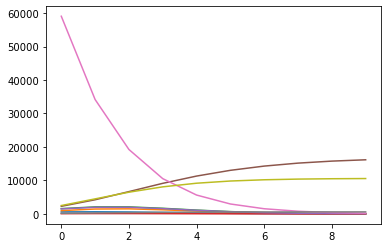

In [45]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(state)


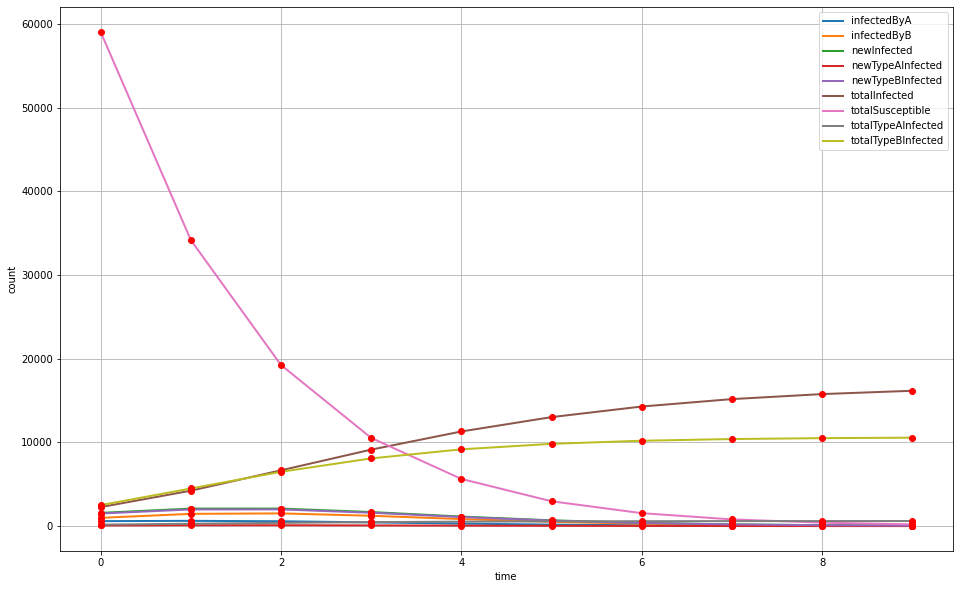

In [46]:

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
state = np.array(state)
plt.figure(figsize=(16, 10))
plt.plot(state[:, 0], lw = 2, label = "infectedByA")
plt.plot(state[:, 1], lw = 2, label = "infectedByB")
plt.plot(state[:, 2], lw = 2, label = "newInfected")
plt.plot(state[:, 3], lw = 2, label = "newTypeAInfected")
plt.plot(state[:, 4], lw = 2, label = "newTypeBInfected")
plt.plot(state[:, 5], lw = 2, label = "totalInfected")
plt.plot(state[:, 6], lw = 2, label = "totalSusceptible")
plt.plot(state[:, 7], lw = 2, label = "totalTypeAInfected")
plt.plot(state[:, 8], lw = 2, label = "totalTypeBInfected")
plt.plot(state,'ro')
plt.grid(True)
plt.axis('tight')
plt.xlabel('time')
plt.ylabel('count')
plt.legend(loc = 0)

In [82]:
import matplotlib    
print(matplotlib.matplotlib_fname())


/Users/sunyifeng/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


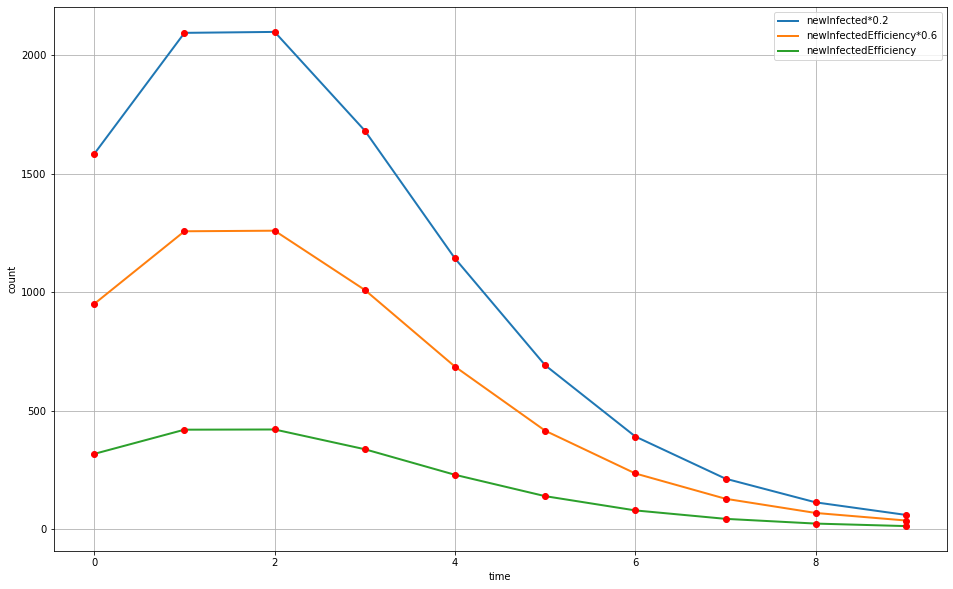

In [56]:
plt.figure(figsize=(16, 10))

plt.plot(state[:, 2], lw = 2, label = "newInfected*0.2")
plt.plot(state[:, 2],'ro')
plt.grid(True)
plt.axis('tight')
plt.xlabel('time')
plt.ylabel('count')
plt.legend(loc = 0)
